# EDA

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIA/Machine Learning/Dataset/House_price_pred/House_price_train.csv')

In [23]:
df.shape

(1460, 81)

In [ ]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

<Axes: >

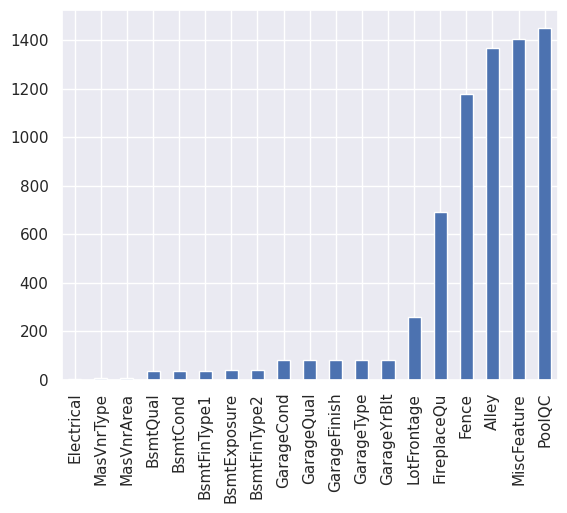

In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

'''19 attributes have missing values, 5 over 50% of all data. 
Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.'''



In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#let's get statistical information about the numeric columns in our dataset. 
#We want to know the mean, the standard deviation, the minimum, the maximum, and the 50th percentile (the median) 
#for each numeric column in the dataset:
df.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Id,730.50,421.61,1.00,730.50,1460.00
MSSubClass,56.90,42.30,20.00,50.00,190.00
LotFrontage,70.05,24.28,21.00,69.00,313.00
LotArea,10516.83,9981.26,1300.00,9478.50,215245.00
OverallQual,6.10,1.38,1.00,6.00,10.00
OverallCond,5.58,1.11,1.00,5.00,9.00
YearBuilt,1971.27,30.20,1872.00,1973.00,2010.00
YearRemodAdd,1984.87,20.65,1950.00,1994.00,2010.00
MasVnrArea,103.69,181.07,0.00,0.00,1600.00
BsmtFinSF1,443.64,456.10,0.00,383.50,5644.00


In [ ]:
#we move to see statistical information about the non-numerical columns in our dataset:

df.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

<ipython-input-21-6ecb2f6a3f01>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).transpose() \


,unique,top,freq
MSZoning,5,RL,1151
Street,2,Pave,1454
Alley,2,Grvl,50
LotShape,4,Reg,925
LandContour,4,Lvl,1311
Utilities,2,AllPub,1459
LotConfig,5,Inside,1052
LandSlope,3,Gtl,1382
Neighborhood,25,NAmes,225
Condition1,9,Norm,1260


In the table we got, 

count represents the number of non-null values in each column, 

unique represents the number of unique values, 

top represents the most frequent element, and freq represents the frequency of the most frequent element.

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#check the decoration
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model!

<ipython-input-10-f1f183c0fd95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


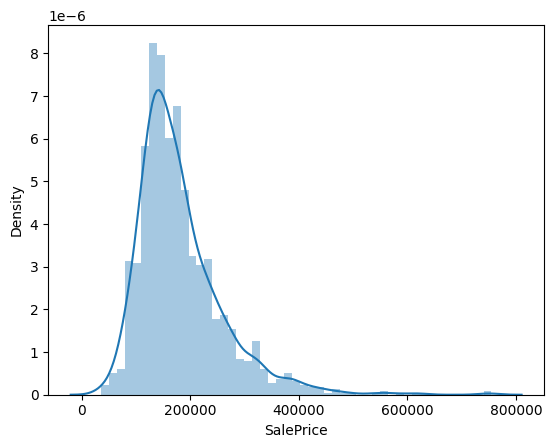

In [ ]:
#histogram
sns.distplot(df['SalePrice']);

In [ ]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

<ipython-input-74-f524e1348cc8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
<ipython-input-74-f524e1348cc8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
<ipython-input-74-f524e1348cc8>:8: UserWarning: 

`distplot` is a deprecate

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice'>

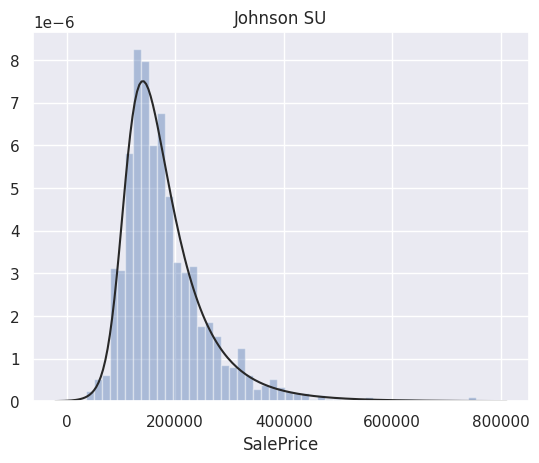

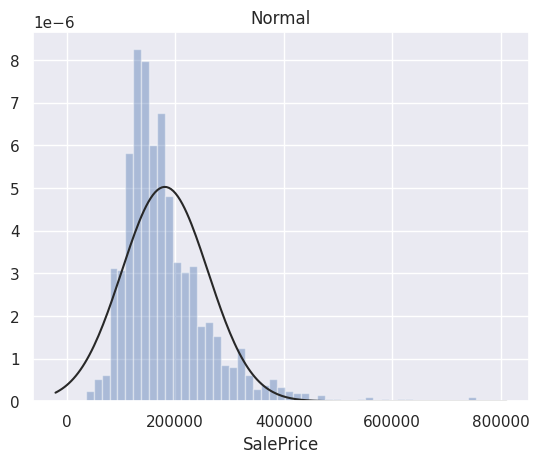

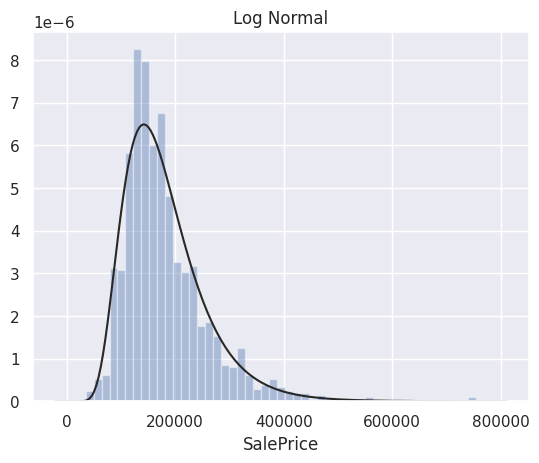

In [ ]:
import scipy.stats as st
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

In [ ]:
import scipy.stats as stats

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

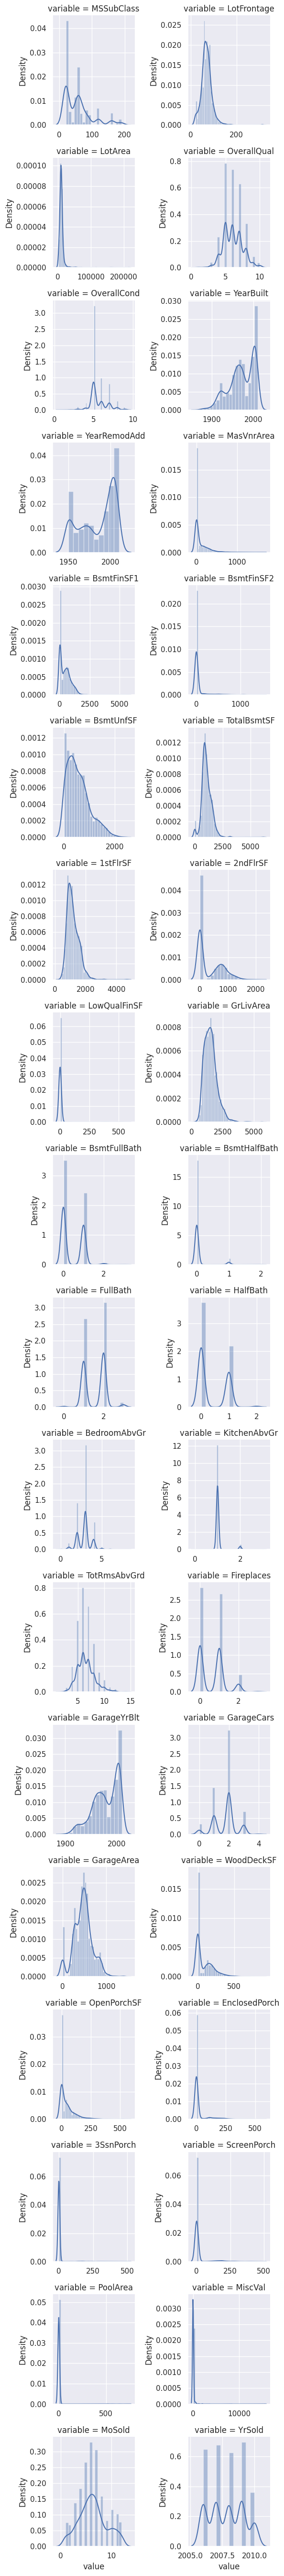

In [ ]:
#Also none of quantitative variables has normal distribution so these should be transformed as well.

f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be important like large amount of houses with 0 2ndFlrSF. Such irregularities are good candidates for feature construction.

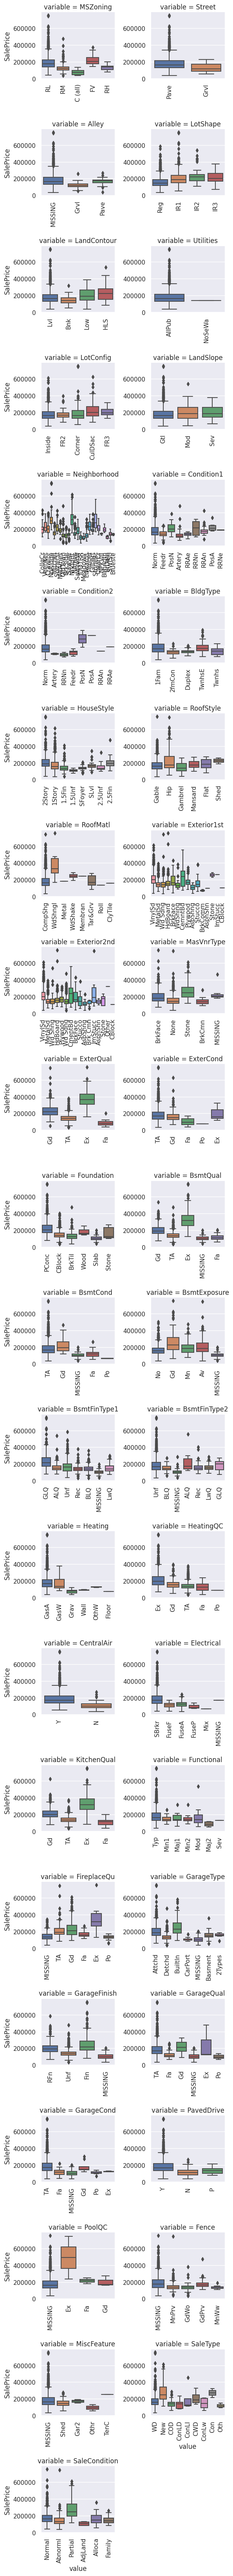

In [ ]:
#Categorical data
'''With qualitative variables we can implement two methods. 
First one is to check distribution of SalePrice with respect to variable values and enumerate them. 
Second to create dummy variable for each possible category.'''

for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
# Getting the number of missing values in each column

miss_val = df.isnull().sum().sort_values(ascending = False)

# Excluding columns that contains 0 missing values

miss_val = miss_val[miss_val > 0]

print (miss_val)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [ ]:
# Getting the percentages of missing values
percent_missing = miss_val * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([miss_val, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageCond,81,5.547945


In [ ]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 38 numerical = 81 features


# Preprocessing

In [24]:
# Dealing with missing values of PoolQc

'''Pool QC
The percentage of missing values in Pool QC column is 99.56% which is very high. 
I think that a missing value in this column denotes that the corresponding house doesn't have a pool. 
To verify this, let's take a look at the values of Pool Area column'''

df["PoolArea"].value_counts()



0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [25]:
df["PoolQC"].fillna("No Pool", inplace=True)

In [26]:
# misc Feature
# Let's take a look at the values of Misc Val column
df["MiscVal"].value_counts()



0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [27]:
#We can see that Misc Val column has 2827 entries with a value of 0. Misc Feature has 2827 missing values. 
#Then, as with Pool QC, we can say that each house without a "miscellaneous feature" has a missing value in Misc Feature column and a value of 0 in Misc Val column.
#So let's fill the missing values in Misc Feature column with "No Feature":

df['MiscFeature'].fillna('No feature', inplace=True)


In [28]:
#Alley, Fence, and Fireplace Qu
#According to the dataset documentation, NA in Alley, Fence, and Fireplace Qu columns denotes that the house doesn't have an alley, fence, or fireplace. 
#So we fill in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace" accordingly:

df['Alley'].fillna('No Alley', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [29]:
#Lot Frontage
'''Lot Frontage represents the linear feet of street connected to the house. 
So we assume that the missing values in this column indicates that the house is not connected to any street, 
and we fill in the missing values with 0'''

df['LotFrontage'].fillna(0, inplace=True)



In [30]:
#Mas Vnr Area and Mas Vnr Type
'''Each of these two columns have 23 missing values. 
We will fill in these missing values with "None" for Mas Vnr Type and with 0 for Mas Vnr Area.
We use "None" for Mas Vnr Type because in the dataset documentation, 
"None" for Mas Vnr Type means "None" (i.e. no masonry veneer):'''

df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna("None", inplace=True)


In [31]:
#Electrical
#This column has one missing value. We will fill in this value with the mode of this column:

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [32]:
#Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type
'''According to the dataset documentation, NA in Garage Cond, Garage Qual, Garage Finish, and Garage Type indicates that there is no garage in the house. 
So we fill in the missing values in these columns with "No Garage". 
We notice that Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt columns have 159 missing values, 
but Garage Type has 157 and both Garage Cars and Garage Area have one missing value. 
Let's take a look at the row that contains the missing value in Garage Cars:'''

#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
#GarageYrBlt : Replacing missing data with 0.

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)
    
df['GarageYrBlt'].fillna(0, inplace=True)


In [ ]:
'''garage_columns = [col for col in df.columns if col.startswith("Garage")]
df[~pd.isna(df['GarageType']) & pd.isna(df['GarageQual'])][garage_columns]'''

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


In [ ]:
bsmt_columns = [col for col in df.columns if "Bsmt" in col]
df[df['BsmtExposure'].isna()][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [ ]:
df[~pd.isna(df['BsmtCond']) & pd.isna(df['BsmtExposure'])][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


We will fill in the missing values in Bsmt Exposure for this row with "No". According to the dataset documentation, "No" for Bsmt Exposure means "No Exposure":

In [ ]:
df[~pd.isna(df['BsmtCond']) & pd.isna(df['BsmtFinType2'])][bsmt_columns]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0


We will fill in the missing value in BsmtFin Type 2 for this row with "Unf". According to the dataset documentation, "Unf" for BsmtFin Type 2 means "Unfinished":


In [33]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
#For all these categorical basement-related features, NaN means that there isn't a basement

df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtExposure']), "BsmtExposure"] = "No"
df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtFinType2']), "BsmtFinType2"] = "Unf"

for col in ["BsmtExposure", "BsmtFinType2", 
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    df[col].fillna("No Basement", inplace=True)

In [34]:
#Now let's check if there is any remaining missing value in our dataset:

df.isna().values.sum()

#This means that our dataset is now complete; it doesn't contain any missing value anymore

0

Outlier Removal

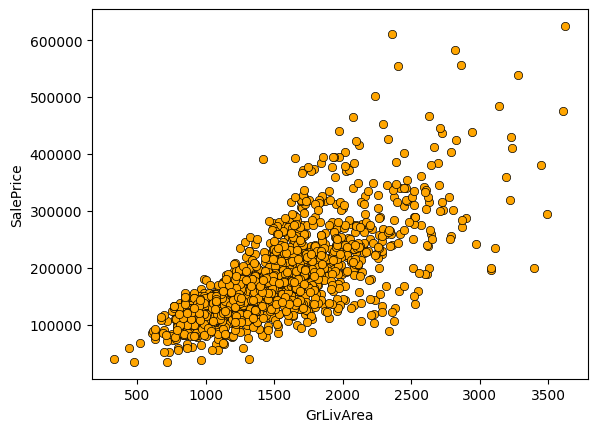

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

We can clearly see the four values meant by the authour in the plot above. Now, we will remove them from our dataset. We can do so by keeping data points that have Gr Liv Area less than 4,000. But first we take a look at the dataset rows that correspond to these unusual values:

In [39]:
outlirt_columns = ["GrLivArea"] + \
                  [col for col in df.columns if "Sale" in col]
df[df["GrLivArea"] > 4000][outlirt_columns]

,GrLivArea,SaleType,SaleCondition,SalePrice


In [40]:
# Now we remove them
df = df[df["GrLivArea"] < 4000]


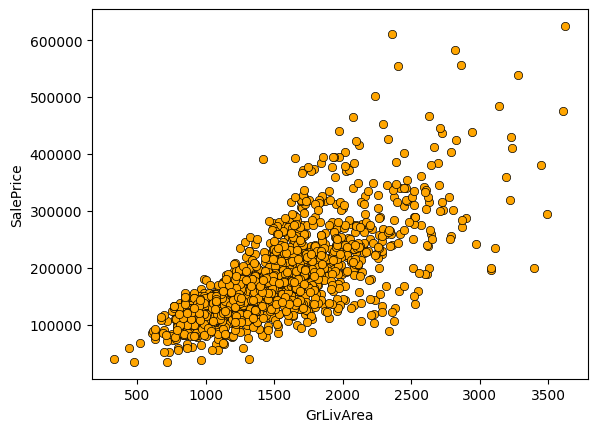

In [41]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

In [42]:
#To avoid problems in modeling later, we will reset our dataset index after removing the outlier rows, so no gaps remain in our dataset index:

df.reset_index(drop=True, inplace=True)


In [43]:
#deleting Some Unimportant Columns
#We will delete columns that are not useful in our analysis. for eg ID:

df.drop('Id', axis=1, inplace=True)

**Target Variable Distribution**

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency. This means that if a violin is the widest between 300 and 400, then the area between 300 and 400 contains more data points than other areas

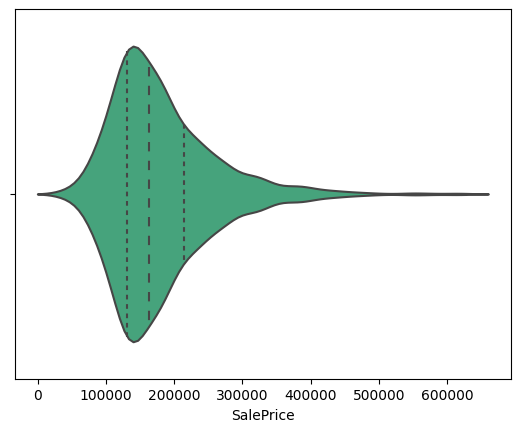

In [ ]:
sns.violinplot(x=df['SalePrice'], inner="quartile", color="#36B37E");

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3. Now let's see the box plot of SalePrice:

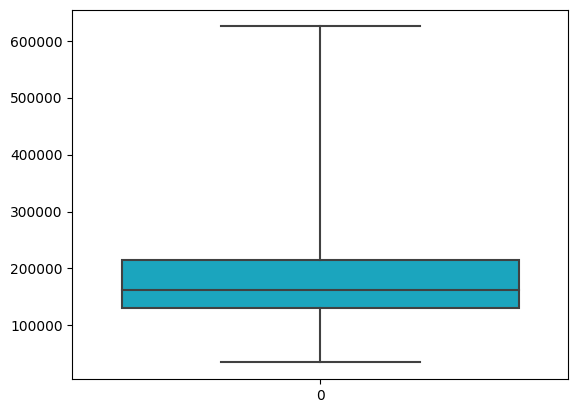

In [ ]:
sns.boxplot(df['SalePrice'], whis=10, color="#00B8D9");


This shows us the minimum and maximum values of SalePrice. It shows us also the three quartiles represented by the box and the vertical line inside of it. Lastly, we plot the histogram of the variable to see a more detailed view of the distribution:

<ipython-input-81-776f9de77135>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


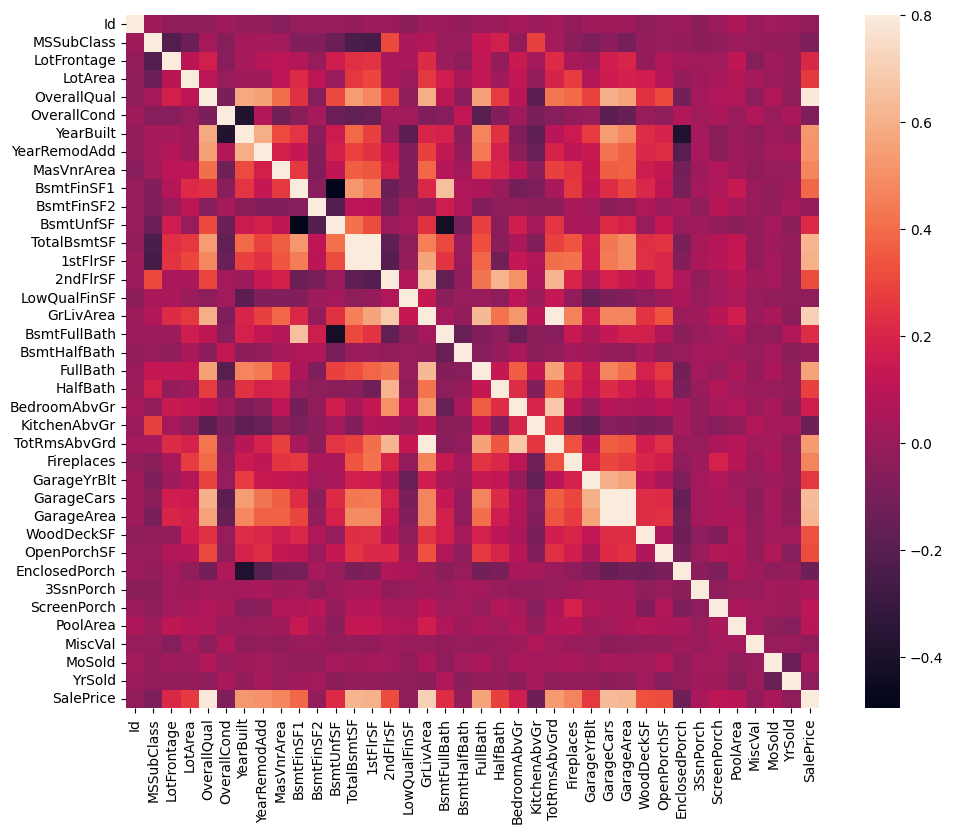

In [ ]:
# Correlation Matrix Heatmap
import matplotlib.pyplot as plt

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<ipython-input-58-5d388a2a79c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], kde=False,


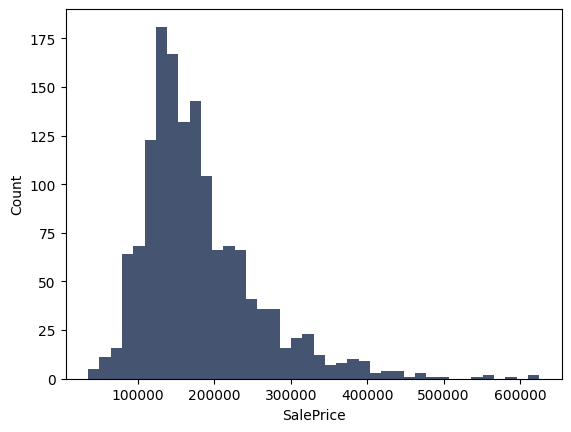

In [ ]:
sns.distplot(df['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, we move to see the distribution of Overall Qual variable:

<ipython-input-82-09684643cce3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OverallQual'], kde=False,


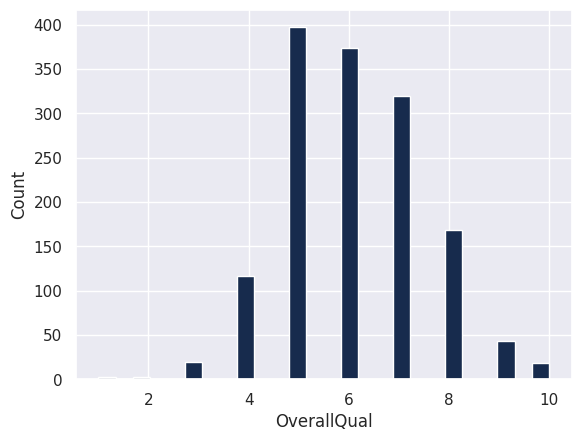

In [ ]:
sns.distplot(df['OverallQual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

We see that Overall Qual takes an integer value between 1 and 10, and that most houses have an overall quality between 5 and 7. Now we plot the scatter plot of SalePrice and Overall Qual to see the relationship between them

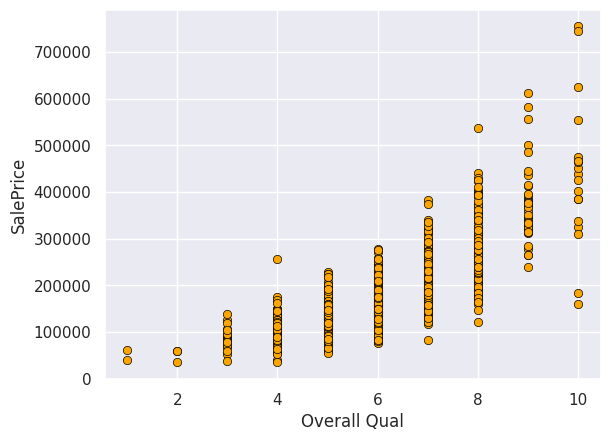

In [ ]:
plt.scatter(x=df['OverallQual'], y=df['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

We can see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what we got from the heatmap above.

Now, we want to see the relationship between the target variable and Gr Liv Area variable which represents the living area above ground. Let us first see the distribution of Gr Liv Area:

<ipython-input-84-32d8a6047428>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GrLivArea'], kde=False,


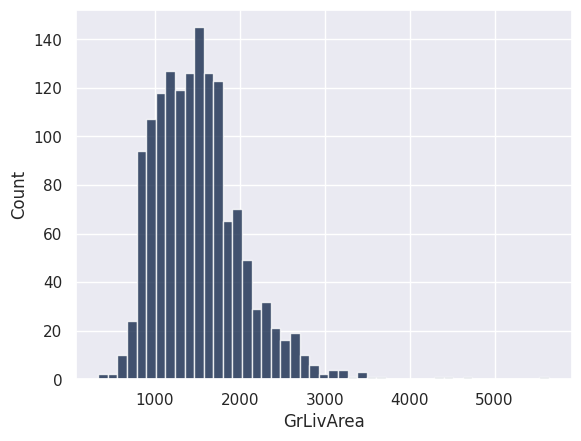

In [ ]:
sns.distplot(df['GrLivArea'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that the above-ground living area falls approximately between 800 and 1800 ft2. Now, let us see the relationship between Gr Liv Area and the target variable:

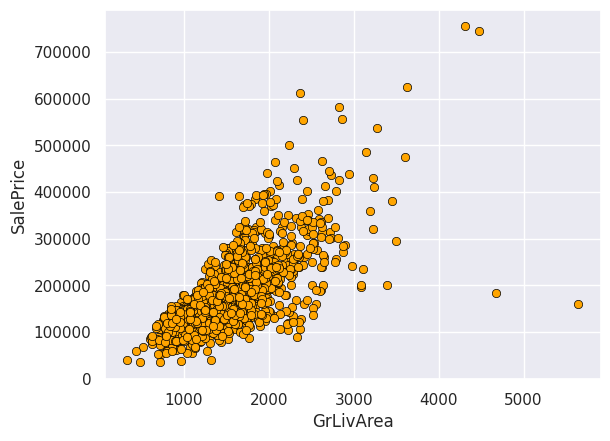

In [ ]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

The scatter plot above shows clearly the strong positive correlation between Gr Liv Area and SalePrice verifying what we found with the heatmap.

**Moderate Positive Correlationt**

Next, we want to visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area. We start with the first four. Let us see the distribution of each of them:

<ipython-input-90-871ebe72a66d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], kde=False, color="#172B4D", hist_kws={"alpha": 0.8}, ax=ax)


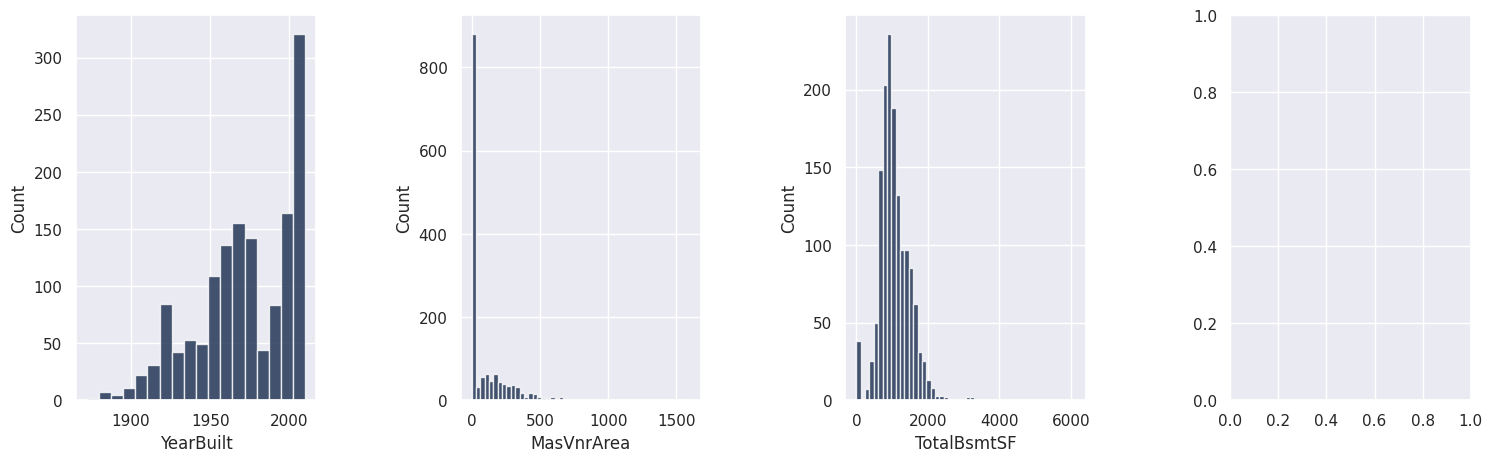

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["YearBuilt", "MasVnrArea", "TotalBsmtSF"]):
    sns.distplot(df[v], kde=False, color="#172B4D", hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

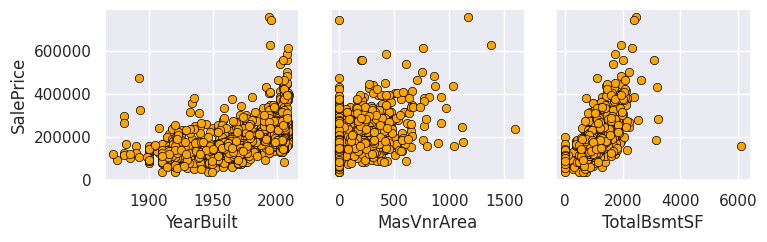

In [ ]:
#Now let us see their relationships with the target variable using scatter plots:

x_vars = ["YearBuilt", "MasVnrArea", "TotalBsmtSF"]
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

<ipython-input-92-8034336647fb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], kde=False, color="#172B4D",


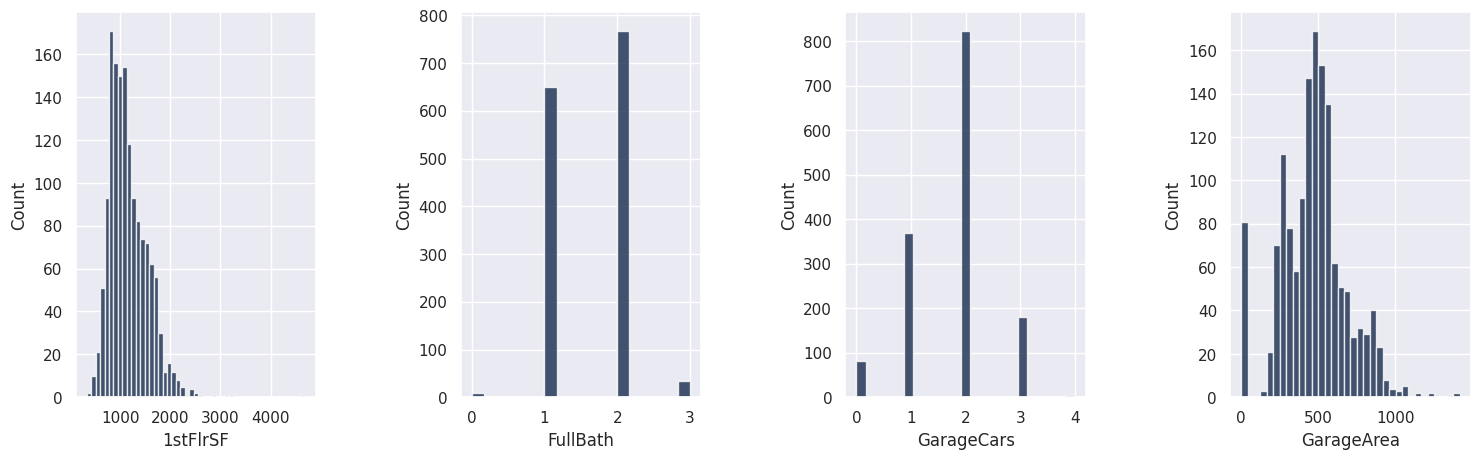

In [ ]:
#Next, we move to the last four. Let us see the distribution of each of them:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1stFlrSF", "FullBath", 
                             "GarageCars", "GarageArea"]):
    sns.distplot(df[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");


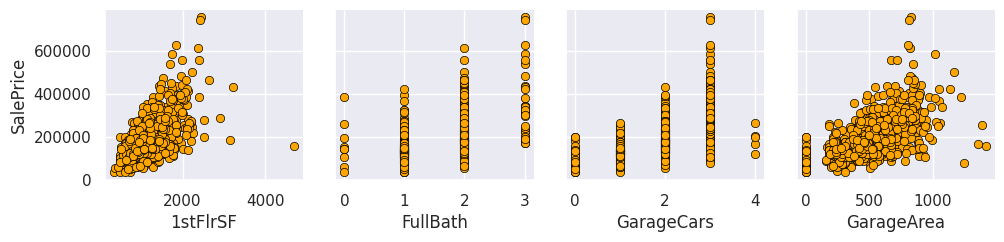

In [ ]:
#And now let us see their relationships with the target variable:

x_vars = ["1stFlrSF", "FullBath", "GarageCars", "GarageArea"]
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);


From the plots above, we can see that these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as Overall Qual and Gr Liv Area

Relatioships Between Predictor Variables

Positive Correlation
Apart from the target variable, when we plotted the heatmap, we discovered a high positive correlation between Garage Cars and Garage Area and between Gr Liv Area and TotRms AbvGrd. We want to visualize these correlations also. We've already seen the distribution of each of them except for TotRms AbvGrd. Let us see the distribution of TotRms AbvGrd first



<ipython-input-96-96f807aff437>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotRmsAbvGrd'], kde=False,


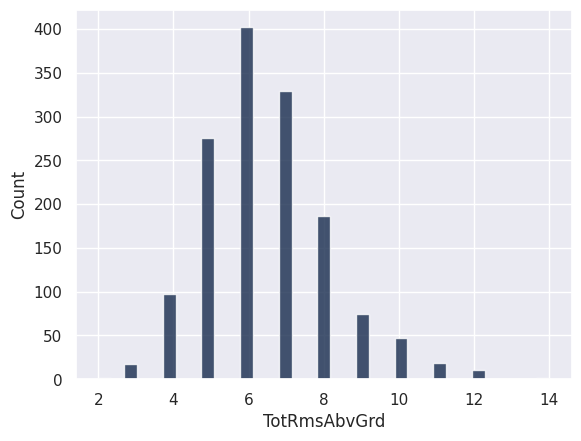

In [ ]:
sns.distplot(df['TotRmsAbvGrd'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

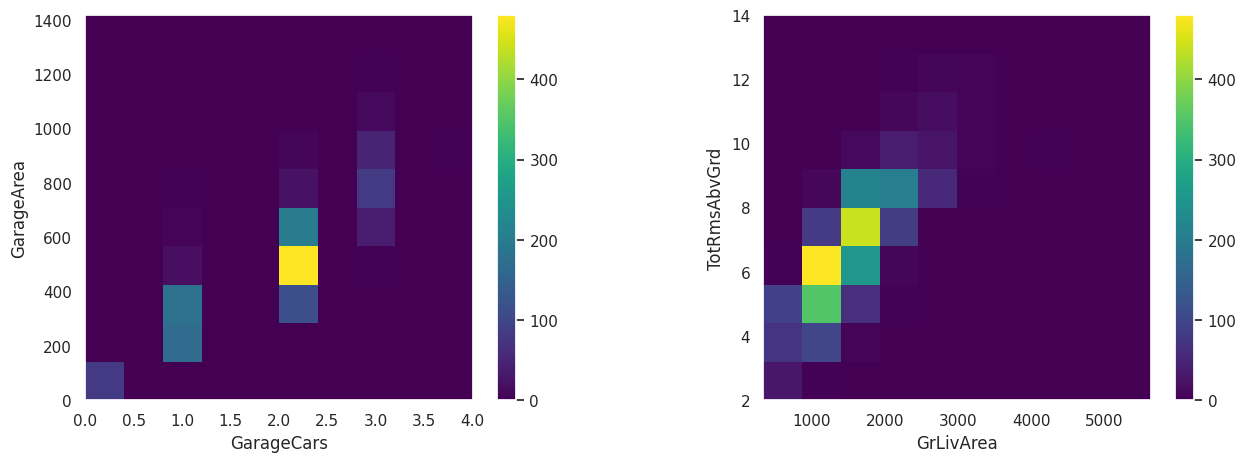

In [ ]:
#Now, we visualize the relationship between Garage Cars and Garage Area and between Gr Liv Area and TotRms AbvGrd:

plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(df["GarageCars"], 
                    df["GarageArea"],
                    cmap="viridis");
axes[0].set(xlabel="GarageCars", ylabel="GarageArea")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(df["GrLivArea"], 
                    df["TotRmsAbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="GrLivArea", ylabel="TotRmsAbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

We can see the strong correlation between each pair. For Garage Cars and Garage Area, we see that the highest concentration of data is when Garage Cars is 2 and Garage Area is approximately between 450 and 600 ft2. For Gr Liv Area and TotRms AbvGrd, we notice that the highest concentration is when Garage Liv Area is roughly between 800 and 2000 ft2 and TotRms AbvGrd is 6.

Negative 

When we plotted the heatmap, we also discovered a significant negative correlation between Bsmt Unf SF and BsmtFin SF 1, and between Bsmt Unf SF and Bsmt Full Bath. We also want to visualize these correlations. Let us see the distribution of these variables first:



<ipython-input-101-26abb7535e2b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], kde=False, color="#172B4D",


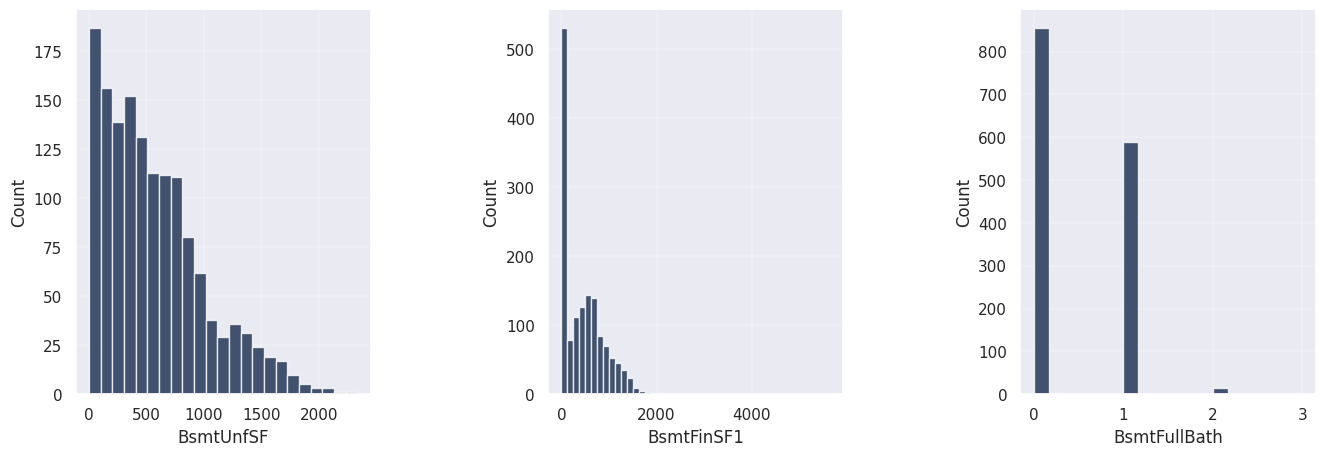

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["BsmtUnfSF", "BsmtFinSF1", "BsmtFullBath"]):
    sns.distplot(df[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

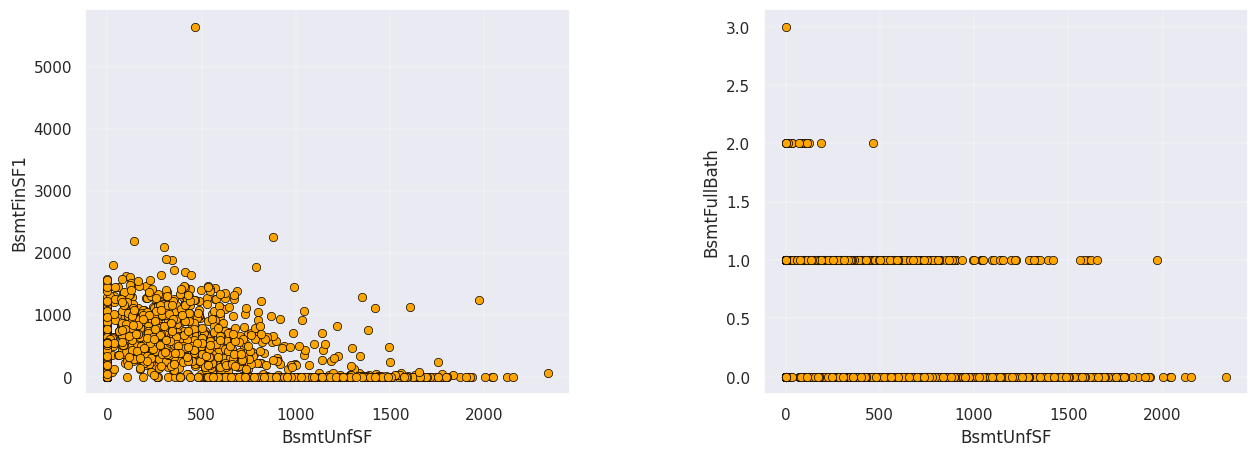

In [ ]:
#Now, we visualize the relationship between each pair using scatter plots:

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(df["BsmtUnfSF"], df["BsmtFinSF1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="BsmtUnfSF", ylabel="BsmtFinSF1");
axes[1].scatter(df["BsmtUnfSF"], df["BsmtFullBath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="BsmtUnfSF", ylabel="BsmtFullBath");


From the plots, we can see the negative correlation between each pair of these variables.

We will use the information we got from exploratory data analysis in this section, we will use it in feature engineering in the next section.

Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

Creating New Derived Features
Firstly, we noticed a high positive correlation between the target variable SalePrice and each of Overall Qual and Gr Liv Area. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create polynomial features out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

**Correlation Between Variables**

We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. For example, we would like to see how Lot Area and SalePrice are correlated: Do they increase and decrease together (positive correlation)? Does one of them increase when the other decrease or vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

We will show correlation between our dataset variables (numerical and boolean variables only) using a heatmap graph:


Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

Creating New Derived Features
Firstly, we noticed a high positive correlation between the target variable SalePrice and each of Overall Qual and Gr Liv Area. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create polynomial features out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

In [44]:
for f in ["OverallQual", "GrLivArea"]:
    df[f + "_p2"] = df[f] ** 2
    df[f + "_p3"] = df[f] ** 3
df["OverallQual_GrLivArea"] = \
    df["OverallQual"] * df["GrLivArea"]

Also, we noticed that there are some predictor features that are highly correlated with each other. To avoid the Multicollinearity problem, we will delete one feature from each pair of highly correlated predictors. We have two pairs: the first consists of Garage Cars and Garage Area, and the other consists of Gr Liv Area and TotRms AbvGrd. For the first pair, we will remove Garage Cars feature; from the second pair, we will remove TotRms AbvGrd feature:

In [45]:
df.drop(["GarageCars", "TotRmsAbvGrd"], axis=1, inplace=True)


Dealing with Ordinal Variables

There are some ordinal features in our dataset. For example, the Bsmt Cond feature has the following possible values:

In [46]:
print("Unique values in 'Bsmt Cond' column:")
print(df['BsmtCond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['TA', 'Gd', 'No Basement', 'Fa', 'Po']


Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking; it will be treated as other categorical features. So to solve this issue, we will map each one of the possible values of this feature to a number. We will map "No Basement" to 0, "Po" to 1, "Fa" to 2, "TA" to 3, "Gd" to 4, and "Ex" to 5.

The ordinal features in the dataset are: Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating QC, Central Air, Kitchen Qual, Functional, Fireplace Qu, GarageFinish, Garage Qual, Garage Cond, Pool QC, Land Slope and Fence. We will map the values of each of them to corresponding numbers as described for Bsmt Cond above and in accordance with the dataset documentation:

In [47]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
df['ExterQual'] = df['ExterQual'].map(mp)
df['ExterCond'] = df['ExterCond'].map(mp)
df['HeatingQC'] = df['HeatingQC'].map(mp)
df['KitchenQual'] = df['KitchenQual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
df['BsmtQual'] = df['BsmtQual'].map(mp)
df['BsmtCond'] = df['BsmtCond'].map(mp)
df['BsmtExposure'] = df['BsmtExposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
df['BsmtFinType1'] = df['BsmtFinType1'].map(mp)
df['BsmtFinType2'] = df['BsmtFinType2'].map(mp)

df['CentralAir'] = df['CentralAir'].map({'Y':1,'N':0})
df['Functional'] = df['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
df['FireplaceQu'] = df['FireplaceQu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
df['GarageFinish'] = df['GarageFinish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
df['GarageQual'] = df['GarageQual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['GarageCond'] = df['GarageCond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['PoolQC'] = df['PoolQC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
df['LandSlope'] = df['LandSlope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
df['Fence'] = df['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

One-Hot Encoding For Categorical Features

Machine learning models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in order for our dataset to be suitable for modeling. We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable; each of the resulting binary variables has only 0 and 1 as its possible values. Pandas package provides a convenient function get_dummies() that can be used for performing one-hot encoding on our dataset.

To see what will happen to our dataset, let us take for example the variable Paved Drive which indicates how the driveway is paved. It has three possible values: Y which means for "Paved", P which means "Partial Pavement", and N which means "Dirt/Gravel". Let us take a look at Paved Drive value for the first few rows in our dataset:

In [48]:
df[['PavedDrive']].head()


,PavedDrive
0,Y
1,Y
2,Y
3,Y
4,Y


In [49]:
#Now, we perform one-hot encoding:

df = pd.get_dummies(df)


In [50]:
#Let us see what has happened to the Paved Drive variable by looking at the same rows above:

pavedDrive_oneHot = [c for c in df.columns if c.startswith("Paved")]
df[pavedDrive_oneHot].head()

,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We can see for example that a value of P in the original Paved Drive column is converted to 1 in Paved Drive_P and zeros in Paved Drive_N and Paved Drive_Y after one-hot encoding.

All categorical column are converted in the same way.

Now, after we have cleaned and prepared our dataset, it is ready for modeling

<ipython-input-64-34555668e97a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax);


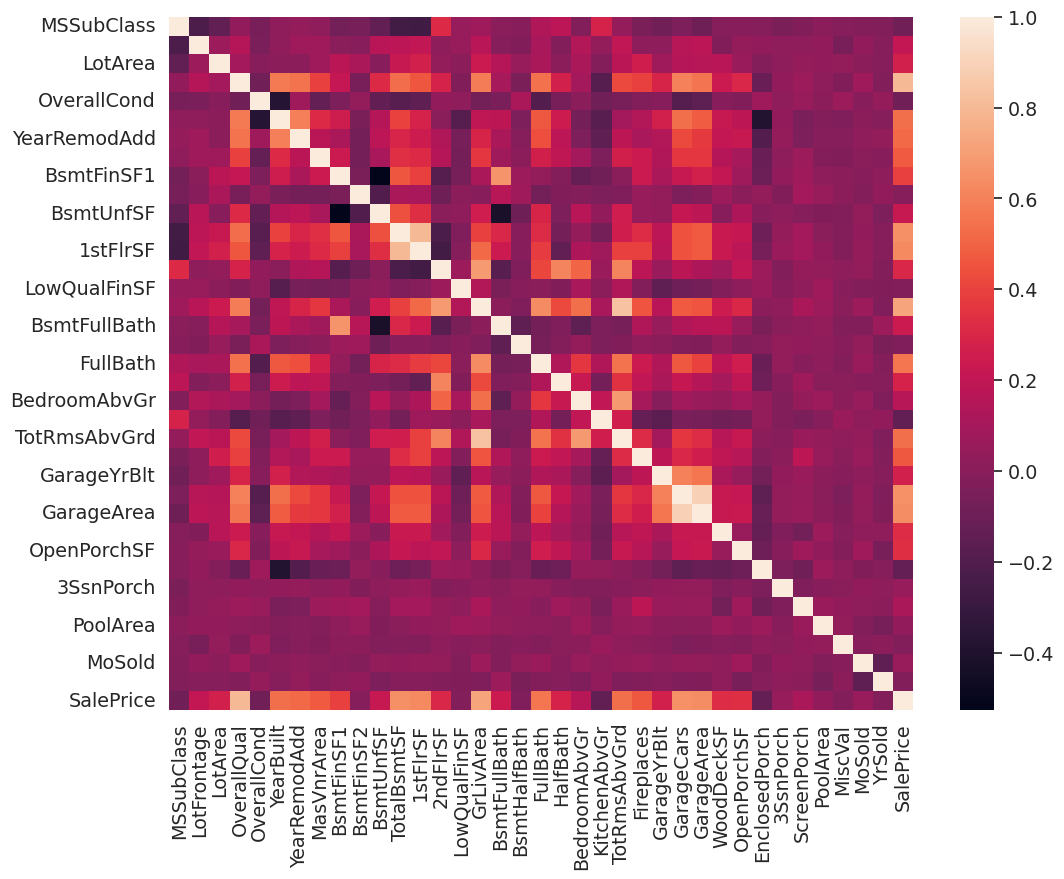

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), ax=ax);

<ipython-input-65-180bcd273578>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


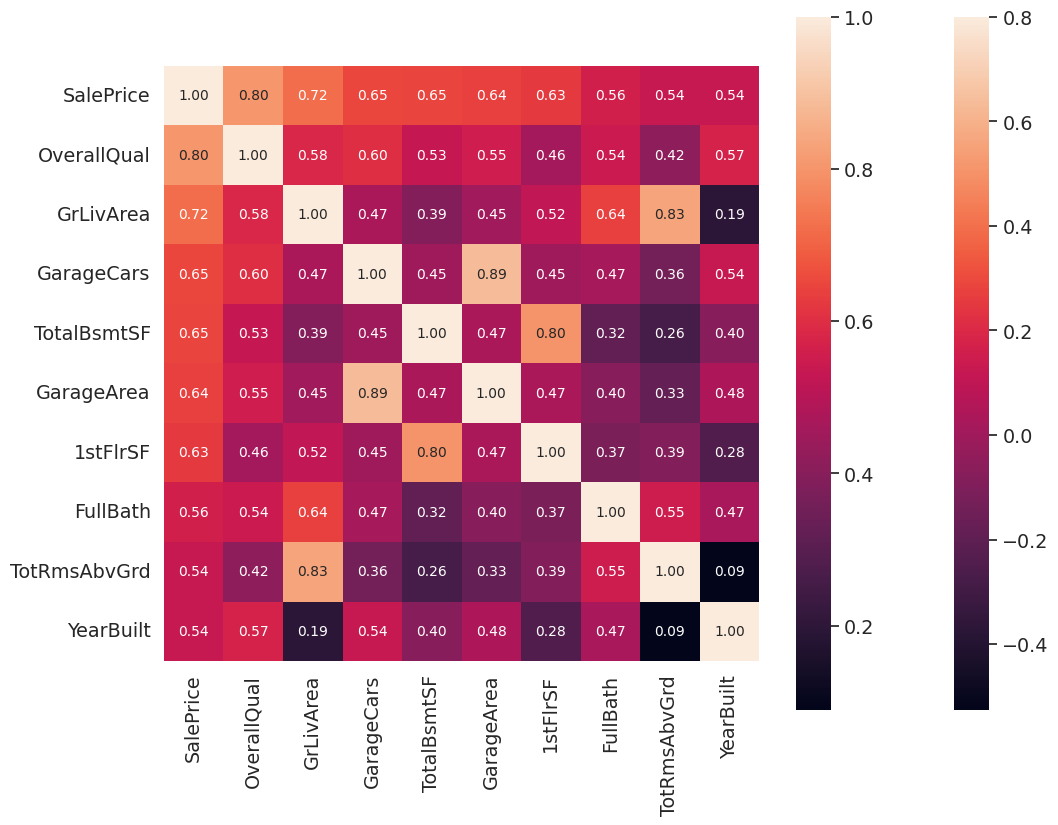

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

'''With 81 features, how could we possibly tell which feature is most related to house prices? 
Good thing we have a correlation matrix. Let's do it!'''
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 

'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

'FullBath'?? Really?

'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


We can see that there are many correlated variables in our dataset. Wwe notice that Garage Cars and Garage Area have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that Gr Liv Area and TotRms AbvGrd are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too.

Regarding negative correlation, we can see that Bsmt Unf SF is negatively correlated with BsmtFin SF 1, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that Bsmt Unf SF is negatively correlated with Bsmt Full Bath which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (SalePrice). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with Overall Qual and Gr Liv Area. We see also that the target variable is positively correlated with Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


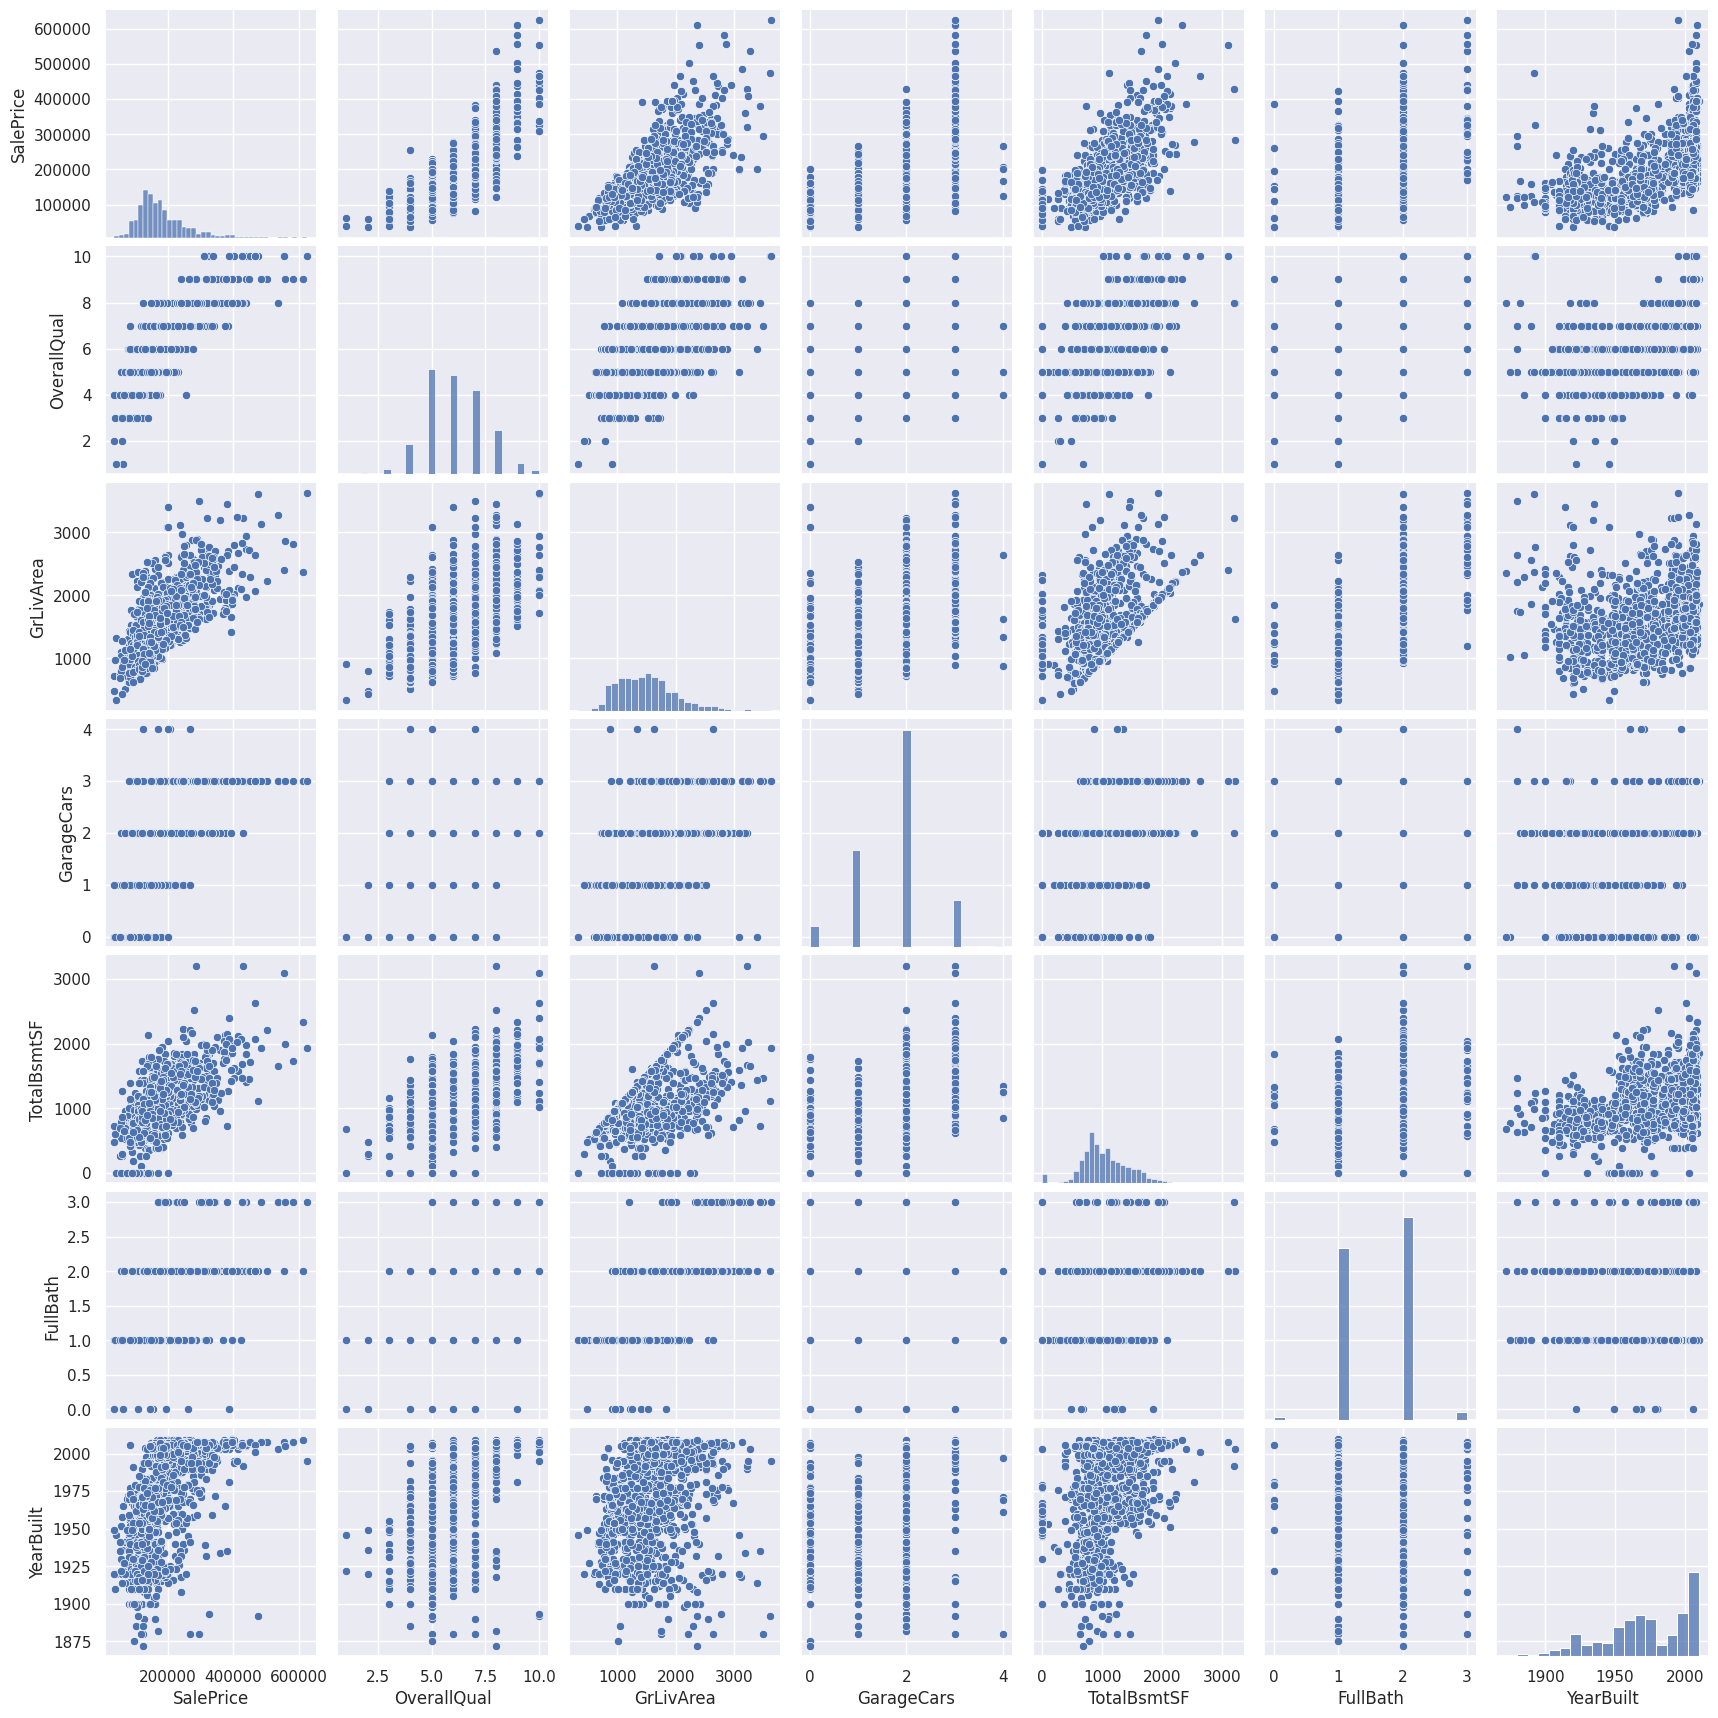

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data

Well, the most correlated feature to Sale Price is... Sale Price?!? Of course. For the other 9, they are as listed. Here is a short description of each. (Thank you, data_description.txt!)

OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
GrLivArea: Above grade (ground) living area square feet
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
TotalBsmtSF: Total square feet of basement area
1stFlrSF: First Floor square feet
FullBath: Full bathrooms above grade
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
YearBuilt: Original construction date

In [ ]:
'''#label Encoding
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))'''



# Skewness

In the search for normality
The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

<ipython-input-53-f1f183c0fd95>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice']);


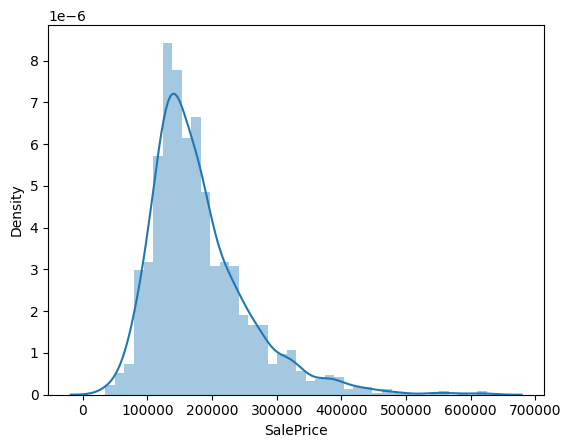

In [53]:
#histogram
sns.distplot(df['SalePrice']);

In [55]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.565959
Kurtosis: 3.885283


In the search for normality
The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

<ipython-input-57-dfa6c1ead419>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm);


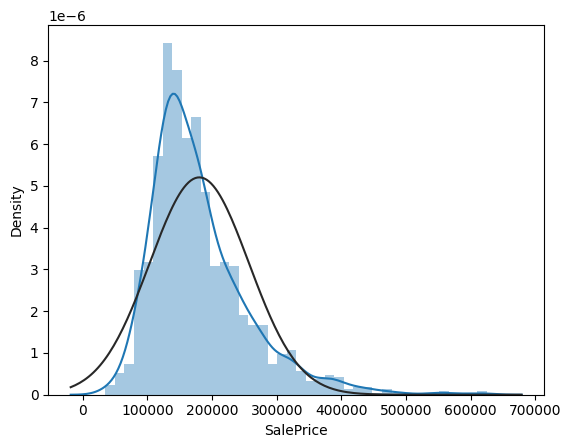

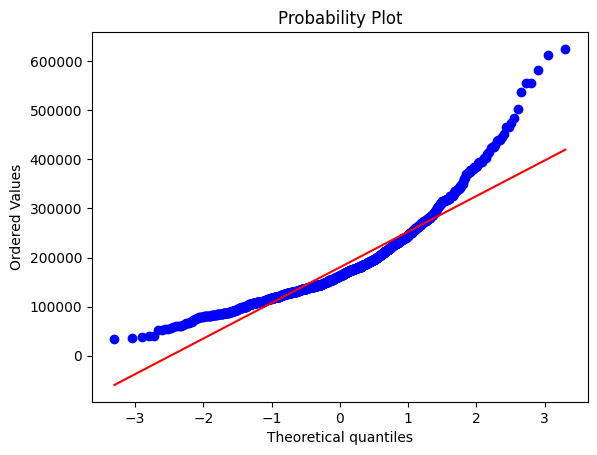

In [57]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

<ipython-input-58-addefdb9280c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=norm);


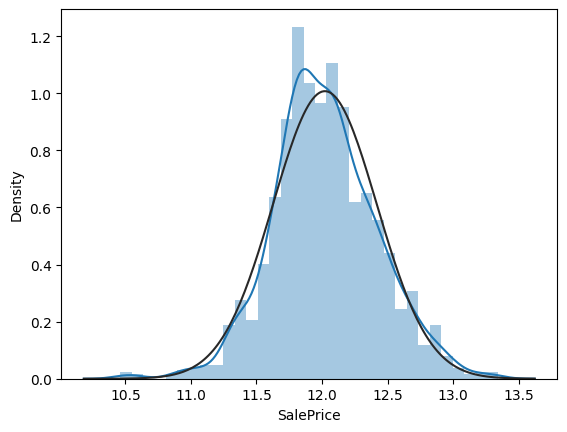

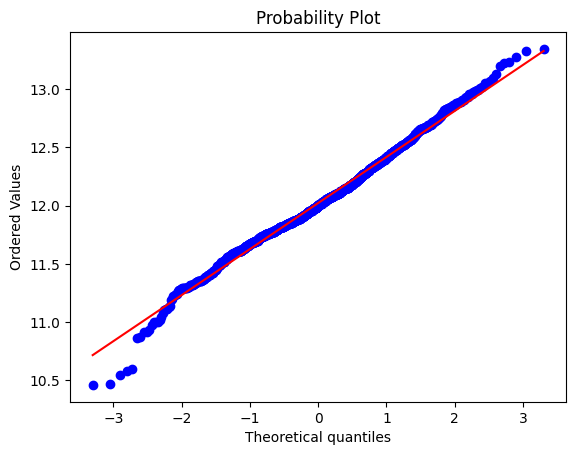

In [58]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

# Feature Scaling

Feature Scaling
In order to make all algorithms work properly with our data, we need to scale the features in our dataset. For that, we will use a helpful function named StandardScaler() from the popular Scikit-Learn Python package. This function standardizes features by subtracting the mean and scaling to unit variance. It works on each feature independently. For a value  x
  of some feature  F
 , the StandardScaler() function performs the following operation:

z=x−μs
 
where  z
  is the result of scaling  x
 ,  μ
  is the mean of feature  F
 , and  s
  is the standard deviation of  F
 .

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
df.loc[:, df.columns != 'SalePrice'] = scaler.fit_transform(
    df.loc[:, df.columns != 'SalePrice'])

In [70]:
df[('SalePrice')]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1451    12.072541
1452    12.254863
1453    12.493130
1454    11.864462
1455    11.901583
Name: SalePrice, Length: 1456, dtype: float64

# Model with SVM with Regressor(SVR)

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,test_size=0.25)

from sklearn.svm import SVR  # Support vector regressor used for regression

sv=SVR(kernel='rbf')

sv.fit(X_train,y_train)

y_pred=sv.predict(X_test)

# Accuracy

In [77]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test,y_pred,squared=False)
rsquare=sv.score(X_train,y_train)

In [78]:
print(rmse)
print(rsquare)

0.193120901894011
0.9618056629399409


In [81]:
from sklearn.metrics import mean_absolute_error
svr_mae = mean_absolute_error(y_test, y_pred)


print(svr_mae)

0.11658670151415663


In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

0.193120901894011